In [1]:
# IMPORTS
import geopandas as gpd
import pandas as pd

import os
import urllib.request
import requests
import shutil
from pathlib import Path
from zipfile import ZipFile

import matplotlib.pyplot as plt
from matplotlib import pyplot

import folium

from geopandas.tools import overlay

In [14]:
print("GLAP version info:")
print("gpd:",gpd.__version__)
print("pd:",pd.__version__)

GLAP version info:
gpd: 0.6.1
pd: 0.25.2


In [3]:
# Designate the URL for a file we want;
file_URL = 'https://www.stlouis-mo.gov/data/upload/data-files/zoning.zip'

# Designate the local filename
local_file_name = 'zoning.zip'

# Designate the local file name with a path to a temp directory.
file_Path = Path('data/')  
file_Path /= local_file_name

# Download the file from `file_url` and save it locally under `file_name`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)
    
# unzip file
to_unzip = ZipFile('data/zoning.zip', 'r')
unzipped = 'data/zoning/'

# to_unzip = ZipFile('data/zoningbackup.zip', 'r')
# unzipped = 'data/zoningbackup/'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file  
        

In [4]:
# read in the zoning data we just unzipped
# zoning = gpd.read_file('data/zoning')
zoning = gpd.read_file('data/zoning')


In [25]:
# take a look the data
zoning.head()


,HANDLE,LAYER,geometry
0,10001000005,X,"POLYGON ((589486.009 1014246.047, 589479.385 1..."
1,10001000010,X,"MULTIPOLYGON (((589502.983 1014298.717, 589502..."
2,10001000020,X,"POLYGON ((589543.160 1014489.573, 589530.804 1..."
3,10001000032,L,"POLYGON ((589616.605 1014189.680, 589610.386 1..."
4,10001000034,X,"POLYGON ((589596.043 1014198.555, 589595.202 1..."


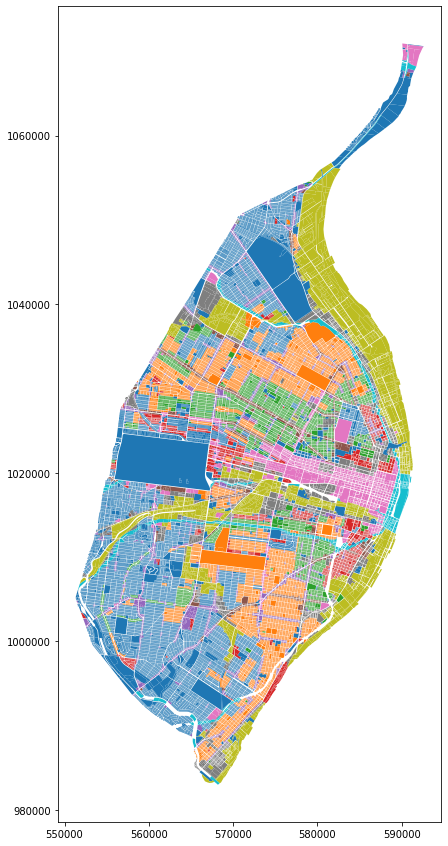

In [6]:
# visualize the data
zoning.plot(figsize=(15,15), column='LAYER')


In [15]:
zoning.LAYER.unique()

array(['X', 'L', 'K', 'F', 'J', 'I', 'H', 'D', '2', 'G', 'E', 'C', 'A',
       'B'], dtype=object)

In [16]:
zoning.loc[zoning['HANDLE'] == '10337000010']

,HANDLE,LAYER,geometry
1046,10337000010,2,"POLYGON ((587663.072 1026798.694, 587674.020 1..."


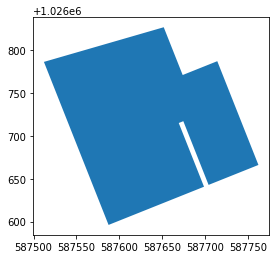

In [19]:
df = zoning.loc[zoning['HANDLE'] == '10337000010']
df.plot(column='LAYER')

In [27]:
zoning.loc[zoning['LAYER'] == 'A']

,HANDLE,LAYER,geometry
2030,10475000141,A,"POLYGON ((584180.090 1013099.398, 584136.262 1..."
2031,10475000142,A,"POLYGON ((584220.317 1013087.102, 584175.276 1..."
2032,10475000143,A,"POLYGON ((584260.543 1013074.806, 584215.153 1..."
2033,10475000144,A,"POLYGON ((584318.543 1013057.077, 584271.050 1..."
2034,10475000145,A,"POLYGON ((584406.417 1013031.461, 584355.386 1..."
...,...,...,...
127371,19120000350,A,"POLYGON ((590689.988 1070079.164, 590567.334 1..."
127372,19120000360,A,"POLYGON ((590569.073 1070170.474, 590565.332 1..."
127375,19121000010,A,"POLYGON ((590312.174 1066856.999, 590314.926 1..."
127381,19121000060,A,"POLYGON ((592577.071 1070606.471, 592559.374 1..."


           HANDLE LAYER                                           geometry
2030  10475000141     A  POLYGON ((584180.090 1013099.398, 584136.262 1...


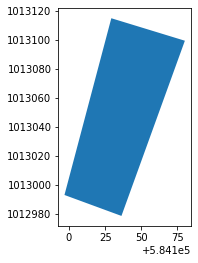

In [28]:
df = zoning.loc[zoning['HANDLE'] == '10475000141']
print(df)
df.plot(column='LAYER')